In [1]:
from pyvis.network import Network
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from collections import deque



In [2]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U nbformat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyvis


Note: you may need to restart the kernel to use updated packages.


# Tree 2d

กรอกเส้นเชื่อมในรูปแบบ: u v w


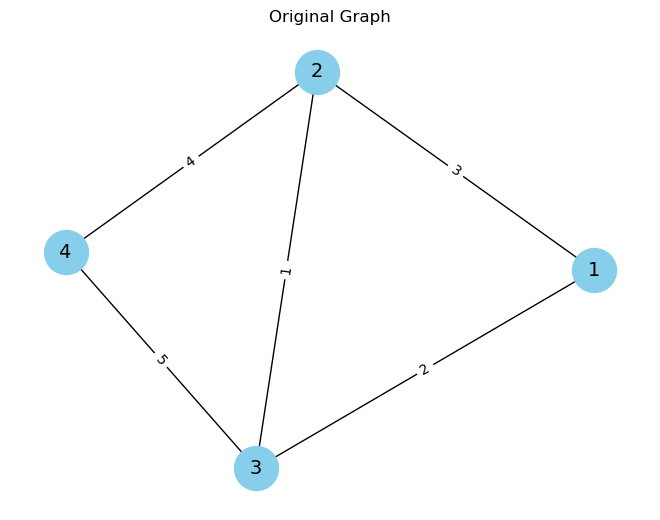

DFS Tree: [(1, 2), (2, 3), (3, 4)]


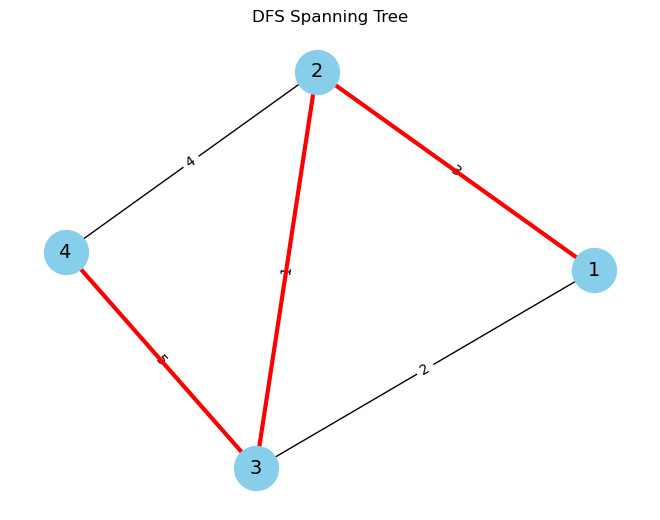

BFS Tree: [(1, 2), (1, 3), (2, 4)]


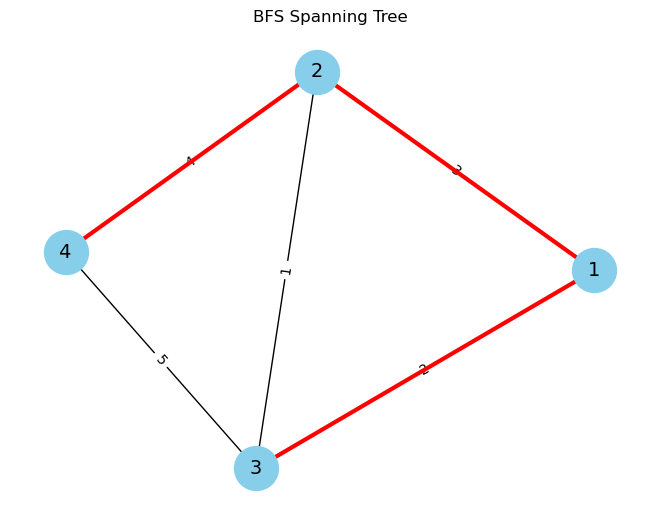

Shortest path 1 → 4 = [1, 3, 4] , distance = 7


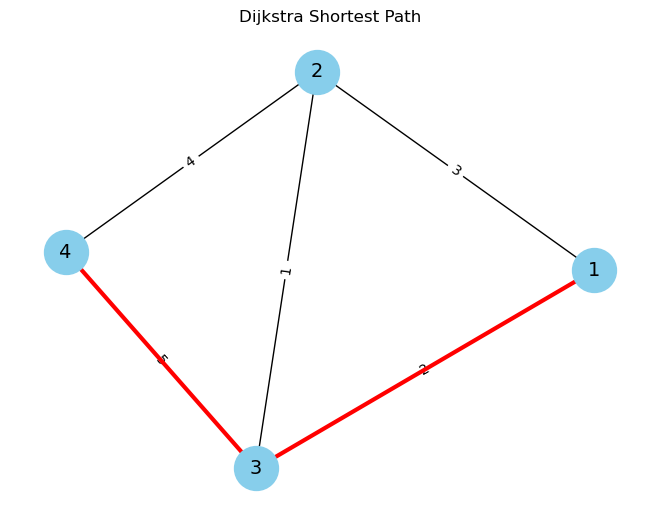

Prim MST: [(1, 3, 2), (3, 2, 1), (2, 4, 4)]


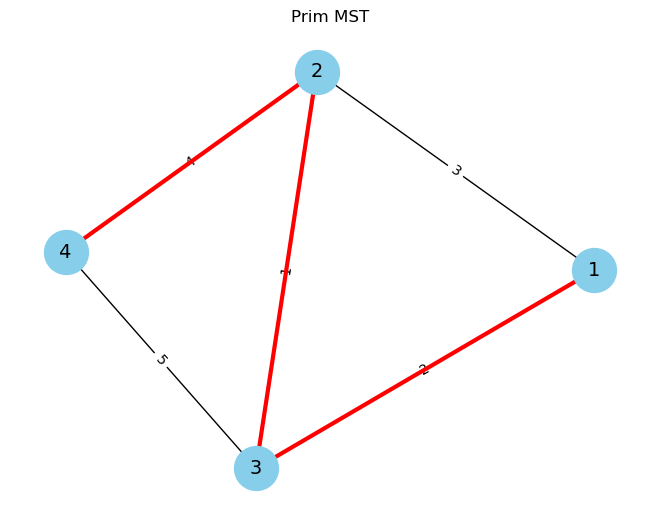

Kruskal MST: [(2, 3, 1), (1, 3, 2), (2, 4, 4)]


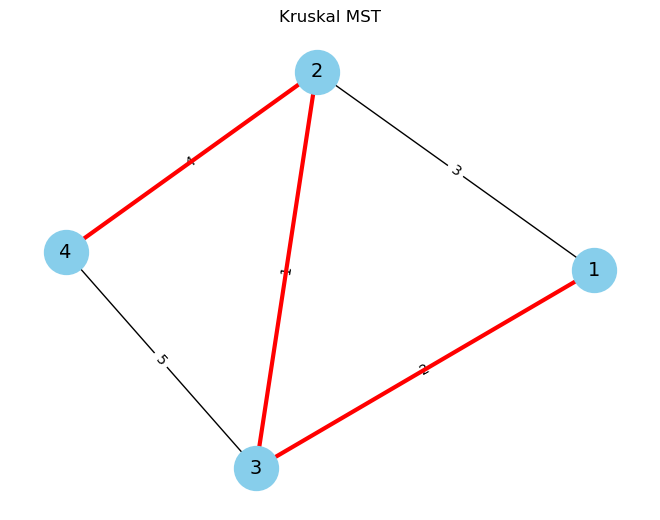

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import sys
from collections import deque

# ---------- ฟังก์ชันแสดงกราฟ ----------
def display_graph(edges, highlight_edges=None, title="Graph"):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    weights = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=14)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, width=3, edge_color='red')

    plt.title(title)
    plt.show()


# ---------- DFS ----------
def spanning_tree_dfs(N, adj, src):
    visited = [False] * (N+1)
    parent = [-1] * (N+1)
    tree_edges = []

    sys.setrecursionlimit(10000)
    def dfs(u):
        visited[u] = True
        for v, _ in adj[u]:
            if not visited[v]:
                parent[v] = u
                tree_edges.append((u, v))
                dfs(v)

    parent[src] = 0
    dfs(src)
    return parent, tree_edges


# ---------- BFS ----------
def spanning_tree_bfs(N, adj, src):
    visited = [False] * (N+1)
    parent = [-1] * (N+1)
    tree_edges = []
    q = deque([src])
    visited[src] = True

    while q:
        u = q.popleft()
        for v, _ in adj[u]:
            if not visited[v]:
                visited[v] = True
                parent[v] = u
                tree_edges.append((u, v))
                q.append(v)
    return parent, tree_edges


# ---------- Dijkstra ----------
def dijkstra(N, adj, start, end):
    dist = [float('inf')] * (N + 1)
    prev = [None] * (N + 1)
    dist[start] = 0
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))

    path = []
    v = end
    while v is not None:
        path.append(v)
        v = prev[v]
    path = path[::-1]

    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return dist[end], path, path_edges


# ---------- Prim ----------
def prim_mst(N, edges):
    adj = [[] for _ in range(N+1)]
    for u, v, w in edges:
        adj[u].append((v, w))
        adj[v].append((u, w))

    visited = [False] * (N+1)
    mst = []
    pq = []

    visited[1] = True
    for v, w in adj[1]:
        heapq.heappush(pq, (w, 1, v))

    while pq and len(mst) < N - 1:
        w, u, v = heapq.heappop(pq)
        if visited[v]:
            continue
        visited[v] = True
        mst.append((u, v, w))

        for nxt, w2 in adj[v]:
            if not visited[nxt]:
                heapq.heappush(pq, (w2, v, nxt))

    return mst


# ---------- Kruskal ----------
def find(parent, x):
    if parent[x] != x:
        parent[x] = find(parent, parent[x])
    return parent[x]

def union(parent, rank, x, y):
    rx = find(parent, x)
    ry = find(parent, y)
    if rx != ry:
        if rank[rx] < rank[ry]:
            parent[rx] = ry
        elif rank[rx] > rank[ry]:
            parent[ry] = rx
        else:
            parent[ry] = rx
            rank[rx] += 1
        return True
    return False

def kruskal_mst(N, edges):
    parent = list(range(N+1))
    rank = [0] * (N+1)
    edges_sorted = sorted(edges, key=lambda x: x[2])
    mst = []

    for u, v, w in edges_sorted:
        if union(parent, rank, u, v):
            mst.append((u, v, w))
            if len(mst) == N - 1:
                break
    return mst


# ---------- Input ----------
N = int(input("กรอกจำนวนโหนด (N): "))
M = int(input("กรอกจำนวนเส้นเชื่อม (M): "))

edges = []
print("กรอกเส้นเชื่อมในรูปแบบ: u v w")
for i in range(M):
    u, v, w = map(int, input(f"เส้นเชื่อมที่ {i+1}: ").split())
    edges.append((u, v, w))

adj = [[] for _ in range(N + 1)]
for u, v, w in edges:
    adj[u].append((v, w))
    adj[v].append((u, w))

s = int(input("จุดเริ่มต้น (source): "))
t = int(input("จุดปลายทาง (target): "))


# ---------- Display ----------
display_graph(edges, title="Original Graph")

# DFS
_, tree_dfs = spanning_tree_dfs(N, adj, s)
print("DFS Tree:", tree_dfs)
display_graph(edges, highlight_edges=tree_dfs, title="DFS Spanning Tree")

# BFS
_, tree_bfs = spanning_tree_bfs(N, adj, s)
print("BFS Tree:", tree_bfs)
display_graph(edges, highlight_edges=tree_bfs, title="BFS Spanning Tree")

# Dijkstra
dist, path, path_edges = dijkstra(N, adj, s, t)
print(f"Shortest path {s} → {t} =", path, ", distance =", dist)
display_graph(edges, highlight_edges=path_edges, title="Dijkstra Shortest Path")

# Prim
prim_edges = prim_mst(N, edges)
prim_highlight = [(u, v) for (u, v, w) in prim_edges]
print("Prim MST:", prim_edges)
display_graph(edges, highlight_edges=prim_highlight, title="Prim MST")

# Kruskal
kruskal_edges = kruskal_mst(N, edges)
kruskal_highlight = [(u, v) for (u, v, w) in kruskal_edges]
print("Kruskal MST:", kruskal_edges)
display_graph(edges, highlight_edges=kruskal_highlight, title="Kruskal MST")


Tree 2d เพิ่มเติม

In [7]:
from pyvis.network import Network
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from collections import deque
import sys

# ---------- ฟังก์ชันแสดงกราฟ ----------
def display_graph(edges, highlight_edges=None, title="Graph"):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    weights = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='skyblue',
            node_size=1000, font_size=14)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges,
                               width=3, edge_color='red')

    plt.title(title)
    plt.show()

# ---------- DFS ----------
def spanning_tree_dfs(N, adj, src):
    visited = [False] * (N+1)
    parent = [-1] * (N+1)
    tree_edges = []

    sys.setrecursionlimit(10000)

    def dfs(u):
        visited[u] = True
        for v, _ in adj[u]:
            if not visited[v]:
                parent[v] = u
                tree_edges.append((u, v))
                dfs(v)

    parent[src] = 0
    dfs(src)
    return parent, tree_edges

# ---------- BFS ----------
def spanning_tree_bfs(N, adj, src):
    visited = [False] * (N+1)
    parent = [-1] * (N+1)
    tree_edges = []
    q = deque([src])
    visited[src] = True

    while q:
        u = q.popleft()
        for v, _ in adj[u]:
            if not visited[v]:
                visited[v] = True
                parent[v] = u
                tree_edges.append((u, v))
                q.append(v)

    return parent, tree_edges

# ---------- Dijkstra ----------
def dijkstra(N, adj, start, end):
    dist = [float('inf')] * (N + 1)
    prev = [None] * (N + 1)
    dist[start] = 0
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))

    path = []
    v = end
    while v is not None:
        path.append(v)
        v = prev[v]
    path.reverse()

    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return dist[end], path, path_edges

# ---------- Prim ----------
def prim_mst(N, edges):
    adj = [[] for _ in range(N+1)]
    for u, v, w in edges:
        adj[u].append((v, w))
        adj[v].append((u, w))

    visited = [False] * (N+1)
    mst = []
    pq = []

    visited[1] = True
    for v, w in adj[1]:
        heapq.heappush(pq, (w, 1, v))

    while pq and len(mst) < N - 1:
        w, u, v = heapq.heappop(pq)
        if visited[v]:
            continue
        visited[v] = True
        mst.append((u, v, w))

        for nxt, w2 in adj[v]:
            if not visited[nxt]:
                heapq.heappush(pq, (w2, v, nxt))

    return mst

# ---------- Kruskal ----------
def find(parent, x):
    if parent[x] != x:
        parent[x] = find(parent, parent[x])
    return parent[x]

def union(parent, rank, x, y):
    rx = find(parent, x)
    ry = find(parent, y)
    if rx != ry:
        if rank[rx] < rank[ry]:
            parent[rx] = ry
        elif rank[rx] > rank[ry]:
            parent[ry] = rx
        else:
            parent[ry] = rx
            rank[rx] += 1
        return True
    return False

def kruskal_mst(N, edges):
    parent = list(range(N+1))
    rank = [0] * (N+1)
    edges_sorted = sorted(edges, key=lambda x: x[2])
    mst = []

    for u, v, w in edges_sorted:
        if union(parent, rank, u, v):
            mst.append((u, v, w))
            if len(mst) == N - 1:
                break

    return mst


# Output


กรอกเส้นเชื่อมในรูปแบบ: u v w

====== เลือกเมนู ======
1. แสดงกราฟทั้งหมด
2. DFS Spanning Tree
3. BFS Spanning Tree
4. Dijkstra Shortest Path
5. Prim Minimum Spanning Tree
6. Kruskal Minimum Spanning Tree
0. ออกจากโปรแกรม

Shortest path 1 → 4 = [1, 3, 4]
distance = 7


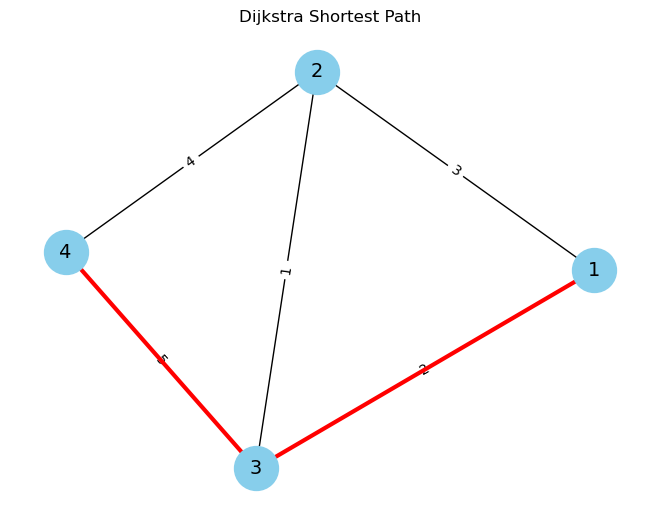


====== เลือกเมนู ======
1. แสดงกราฟทั้งหมด
2. DFS Spanning Tree
3. BFS Spanning Tree
4. Dijkstra Shortest Path
5. Prim Minimum Spanning Tree
6. Kruskal Minimum Spanning Tree
0. ออกจากโปรแกรม
ปิดโปรแกรมแล้วค่ะ!


In [9]:

# ---------- Input ----------
N = int(input("กรอกจำนวนโหนด (N): "))
M = int(input("กรอกจำนวนเส้นเชื่อม (M): "))

edges = []
print("\nกรอกเส้นเชื่อมในรูปแบบ: u v w")
for i in range(M):
    u, v, w = map(int, input(f"เส้นเชื่อมที่ {i+1}: ").split())
    edges.append((u, v, w))

adj = [[] for _ in range(N + 1)]
for u, v, w in edges:
    adj[u].append((v, w))
    adj[v].append((u, w))

s = int(input("\nจุดเริ่มต้น (source): "))
t = int(input("จุดปลายทาง (target สำหรับ Dijkstra): "))
# ---------- เมนูหลัก ----------
while True:
    print("\n====== เลือกเมนู ======")
    print("1. แสดงกราฟทั้งหมด")
    print("2. DFS Spanning Tree")
    print("3. BFS Spanning Tree")
    print("4. Dijkstra Shortest Path")
    print("5. Prim Minimum Spanning Tree")
    print("6. Kruskal Minimum Spanning Tree")
    print("0. ออกจากโปรแกรม")

    choice = input("เลือกหมายเลข: ")

    if choice == "1":
        display_graph(edges, title="Original Graph")

    elif choice == "2":
        _, tree_dfs = spanning_tree_dfs(N, adj, s)
        print("DFS Tree:", tree_dfs)
        display_graph(edges, highlight_edges=tree_dfs, title="DFS Spanning Tree")

    elif choice == "3":
        _, tree_bfs = spanning_tree_bfs(N, adj, s)
        print("BFS Tree:", tree_bfs)
        display_graph(edges, highlight_edges=tree_bfs, title="BFS Spanning Tree")

    elif choice == "4":
        dist, path, path_edges = dijkstra(N, adj, s, t)
        print(f"\nShortest path {s} → {t} =", path)
        print("distance =", dist)
        display_graph(edges, highlight_edges=path_edges,
                      title="Dijkstra Shortest Path")

    elif choice == "5":
        prim_edges = prim_mst(N, edges)
        prim_highlight = [(u, v) for (u, v, w) in prim_edges]
        print("Prim MST:", prim_edges)
        display_graph(edges, highlight_edges=prim_highlight, title="Prim MST")

    elif choice == "6":
        kruskal_edges = kruskal_mst(N, edges)
        kruskal_highlight = [(u, v) for (u, v, w) in kruskal_edges]
        print("Kruskal MST:", kruskal_edges)
        display_graph(edges, highlight_edges=kruskal_highlight,
                      title="Kruskal MST")

    elif choice == "0":
        print("ปิดโปรแกรมแล้วค่ะ!")
        break

    else:
        print("❌ กรุณาเลือกหมายเลขที่ถูกต้อง")


In [6]:
import sys
!{sys.executable} -m pip install --upgrade nbformat


In [7]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


# Tree 3D

In [18]:
import plotly.graph_objects as go
import networkx as nx
import heapq
import random
from collections import deque
import sys

# ---------- ฟังก์ชันสุ่มพิกัด 3D ----------
def random_3d_positions(G):
    pos = {}
    for node in G.nodes():
        pos[node] = (
            random.uniform(-1, 1),
            random.uniform(-1, 1),
            random.uniform(-1, 1)
        )
    return pos

# ---------- วาดกราฟแบบ 3D ----------
def draw_3d_graph(edges, highlight_edges=None, title="3D Graph"):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = random_3d_positions(G)
    
    # เส้นของทุก edge
    edge_x, edge_y, edge_z = [], [], []
    for u, v, w in edges:
        edge_x += [pos[u][0], pos[v][0], None]
        edge_y += [pos[u][1], pos[v][1], None]
        edge_z += [pos[u][2], pos[v][2], None]

    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        line=dict(width=2, color='lightgray'),
        hoverinfo='none', mode='lines'
    )

    # เส้นที่ต้องการไฮไลต์ (เช่น MST หรือ shortest path)
    if highlight_edges:
        hx, hy, hz = [], [], []
        for u, v in highlight_edges:
            hx += [pos[u][0], pos[v][0], None]
            hy += [pos[u][1], pos[v][1], None]
            hz += [pos[u][2], pos[v][2], None]
        highlight_trace = go.Scatter3d(
            x=hx, y=hy, z=hz,
            line=dict(width=6, color='magenta'),
            hoverinfo='none', mode='lines'
        )
    else:
        highlight_trace = None

    # จุดของโหนด
    node_x, node_y, node_z, node_text = [], [], [], []
    for node in G.nodes():
        node_x.append(pos[node][0])
        node_y.append(pos[node][1])
        node_z.append(pos[node][2])
        node_text.append(str(node))

    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        text=node_text,
        textposition="top center",
        marker=dict(
            size=15,
            color=[random.choice(["#FFB6C1", "#87CEFA", "#98FB98", "#FFD700", "#FFA07A"]) for _ in G.nodes()],
            line=dict(width=2, color='black')
        )
    )

    data = [edge_trace, node_trace]
    if highlight_trace:
        data.insert(1, highlight_trace)

    fig = go.Figure(data=data)
    fig.update_layout(
        title=title,
        showlegend=False,
        scene=dict(
            xaxis=dict(showbackground=False, visible=False),
            yaxis=dict(showbackground=False, visible=False),
            zaxis=dict(showbackground=False, visible=False)
        ),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()


# ---------- DFS ----------
def spanning_tree_dfs(N, adj, src):
    visited = [False] * (N + 1)
    parent = [-1] * (N + 1)
    tree_edges = []
    sys.setrecursionlimit(10000)

    def dfs(u):
        visited[u] = True
        for v, _ in adj[u]:
            if not visited[v]:
                parent[v] = u
                tree_edges.append((u, v))
                dfs(v)

    dfs(src)
    return parent, tree_edges


# ---------- BFS ----------
def spanning_tree_bfs(N, adj, src):
    visited = [False] * (N + 1)
    parent = [-1] * (N + 1)
    tree_edges = []
    q = deque([src])
    visited[src] = True
    while q:
        u = q.popleft()
        for v, _ in adj[u]:
            if not visited[v]:
                visited[v] = True
                parent[v] = u
                tree_edges.append((u, v))
                q.append(v)
    return parent, tree_edges


# ---------- Dijkstra ----------
def dijkstra(N, adj, start, end):
    dist = [float('inf')] * (N + 1)
    prev = [None] * (N + 1)
    dist[start] = 0
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))

    path = []
    v = end
    while v is not None:
        path.append(v)
        v = prev[v]
    path = path[::-1]
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return dist[end], path, path_edges


# ---------- MST ----------
def mst_prim(N, edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    mst = nx.minimum_spanning_tree(G, algorithm='prim')
    return list(mst.edges())

def mst_kruskal(N, edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
    return list(mst.edges())


# ---------- รับข้อมูลจากผู้ใช้ ----------
N = int(input("กรอกจำนวนโหนด (N): "))
M = int(input("กรอกจำนวนเส้นเชื่อม (M): "))

edges = []
print("กรอกเส้นเชื่อมในรูปแบบ: u v w (เช่น 1 2 3)")
for i in range(M):
    u, v, w = map(int, input(f"เส้นเชื่อมที่ {i+1}: ").split())
    edges.append((u, v, w))

adj = [[] for _ in range(N + 1)]
for u, v, w in edges:
    adj[u].append((v, w))
    adj[v].append((u, w))

s = int(input("กรอกจุดเริ่มต้น (source node): "))
t = int(input("กรอกจุดปลายทาง (target node สำหรับ Dijkstra): "))


# 1️⃣ กราฟพื้นฐาน
draw_3d_graph(edges, title="🌈 Original 3D Graph")

# 2️⃣ DFS Spanning Tree
parent, tree_edges = spanning_tree_dfs(N, adj, s)
print("DFS Spanning Tree edges:", tree_edges)
draw_3d_graph(edges, highlight_edges=tree_edges, title="🔥 DFS Spanning Tree (3D)")

# 3️⃣ BFS Spanning Tree
parent, tree_edges = spanning_tree_bfs(N, adj, s)
print("BFS Spanning Tree edges:", tree_edges)
draw_3d_graph(edges, highlight_edges=tree_edges, title="💧 BFS Spanning Tree (3D)")

# 4️⃣ Dijkstra
dist, path, path_edges = dijkstra(N, adj, 1, 4)
print(f"Shortest path 1→4: {path}, distance = {dist}")
draw_3d_graph(edges, highlight_edges=path_edges, title="💫 Dijkstra Shortest Path (1→4)")

# 5️⃣ Prim’s MST
prim_edges = mst_prim(N, edges)
print("Prim’s MST:", prim_edges)
draw_3d_graph(edges, highlight_edges=prim_edges, title="🌿 Prim’s Minimum Spanning Tree")

# 6️⃣ Kruskal’s MST
kruskal_edges = mst_kruskal(N, edges)
print("Kruskal’s MST:", kruskal_edges)
draw_3d_graph(edges, highlight_edges=kruskal_edges, title="🌸 Kruskal’s Minimum Spanning Tree")


กรอกเส้นเชื่อมในรูปแบบ: u v w (เช่น 1 2 3)


DFS Spanning Tree edges: [(1, 2), (2, 3), (3, 4)]


BFS Spanning Tree edges: [(1, 2), (1, 3), (2, 4)]


Shortest path 1→4: [1, 3, 4], distance = 7


Prim’s MST: [(1, 3), (2, 3), (2, 4)]


Kruskal’s MST: [(1, 3), (2, 3), (2, 4)]


In [10]:
from pyvis.network import Network
from IPython.display import HTML, display
import tempfile, os

def display_graph_interactive(N, edges):
    net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)
    
    for i in range(1, N+1):
        net.add_node(i, label=str(i))
    for u, v, w in edges:
        net.add_edge(u, v, value=w, title=f"Weight: {w}")

    # ✅ สร้างไฟล์ในที่ปลอดภัย (ชั่วคราว)
    temp_dir = tempfile.gettempdir()
    html_path = os.path.join(temp_dir, "graph.html")

    net.save_graph(html_path)  # ใช้ save_graph แทน show เพื่อไม่เรียก browser
    
    with open(html_path, "r", encoding="utf-8") as f:
        html_content = f.read()
    display(HTML(html_content))
